In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:

dat = yf.Ticker('MSFT')

In [2]:
dat = yf.Ticker('MSFT')
dat.info
dat.calendar
dat.analyst_price_targets
dat.quarterly_income_stmt
dat.history(period='1mo')
dat.option_chain(dat.options[0]).calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT251107C00270000,2025-11-04 18:24:19+00:00,270.0,240.50,0.0,0.0,0.0,0.0,3.0,0,0.000010,True,REGULAR,USD
1,MSFT251107C00280000,2025-09-30 14:11:52+00:00,280.0,234.52,0.0,0.0,0.0,0.0,NaN,0,0.000010,True,REGULAR,USD
2,MSFT251107C00290000,2025-09-30 14:11:52+00:00,290.0,225.27,0.0,0.0,0.0,0.0,NaN,0,0.000010,True,REGULAR,USD
3,MSFT251107C00300000,2025-09-29 19:26:07+00:00,300.0,216.86,0.0,0.0,0.0,0.0,NaN,0,0.000010,True,REGULAR,USD
4,MSFT251107C00310000,2025-09-30 19:20:03+00:00,310.0,208.88,0.0,0.0,0.0,0.0,NaN,0,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,MSFT251107C00630000,2025-11-03 15:57:12+00:00,630.0,0.01,0.0,0.0,0.0,0.0,38.0,0,0.500005,False,REGULAR,USD
102,MSFT251107C00635000,2025-11-03 15:57:15+00:00,635.0,0.01,0.0,0.0,0.0,0.0,18.0,0,0.500005,False,REGULAR,USD
103,MSFT251107C00640000,2025-11-03 14:30:03+00:00,640.0,0.02,0.0,0.0,0.0,0.0,1.0,0,0.500005,False,REGULAR,USD
104,MSFT251107C00645000,2025-10-31 19:37:46+00:00,645.0,0.04,0.0,0.0,0.0,0.0,22.0,0,0.500005,False,REGULAR,USD


In [3]:
tickers = yf.Tickers('MSFT AAPL GOOG')
tickers.tickers['MSFT'].info
yf.download(['MSFT', 'AAPL', 'GOOG'], period='1mo')

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_13816\2129763561.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf.download(['MSFT', 'AAPL', 'GOOG'], period='1mo')
[*********************100%***********************]  3 of 3 completed


Price            Close                                High              \
Ticker            AAPL        GOOG        MSFT        AAPL        GOOG   
Date                                                                     
2025-10-06  256.690002  251.509995  528.570007  259.070007  252.199997   
2025-10-07  256.480011  247.130005  523.979980  257.399994  251.550003   
2025-10-08  258.059998  245.460007  524.849976  258.519989  247.259995   
2025-10-09  254.039993  242.210007  522.400024  258.000000  245.554993   
2025-10-10  245.270004  237.490005  510.959991  256.380005  244.839996   
2025-10-13  247.660004  244.639999  514.049988  249.690002  244.990005   
2025-10-14  247.770004  246.190002  513.570007  248.850006  248.024994   
2025-10-15  249.339996  251.710007  513.429993  251.820007  252.759995   
2025-10-16  247.449997  251.880005  511.609985  249.039993  257.579987   
2025-10-17  252.289993  253.789993  513.580017  253.380005  254.880005   
2025-10-20  262.239990  257.019989  516.789978  264.380005  257.880005   
2025-10-21  262.769989  251.339996  517.659973  265.290009  255.380005   
2025-10-22  258.450012  252.529999  520.539978  262.850006  257.179993   
2025-10-23  259.579987  253.729996  520.559998  260.619995  255.860001   
2025-10-24  262.820007  260.510010  523.609985  264.130005  262.510010   
2025-10-27  268.809998  269.929993  531.520020  269.119995  270.799988   
2025-10-28  269.000000  268.429993  542.070007  269.890015  271.380005   
2025-10-29  269.700012  275.170013  541.549988  271.410004  275.970001   
2025-10-30  271.399994  281.899994  525.760010  274.140015  291.929993   
2025-10-31  270.369995  281.820007  517.809998  277.320007  286.285004   
2025-11-03  269.049988  284.119995  517.030029  270.850006  285.940002   
2025-11-04  270.040009  278.059998  514.330017  271.489990  281.834015   

Price                          Low                                Open  \
Ticker            MSFT        AAPL        GOOG        MSFT        AAPL   
Date                                                                     
2025-10-06  531.030029  255.050003  245.690002  518.200012  257.989990   
2025-10-07  529.799988  255.429993  246.809998  521.440002  256.809998   
2025-10-08  526.950012  256.109985  245.089996  523.090027  256.519989   
2025-10-09  524.330017  253.139999  239.679993  517.400024  257.809998   
2025-10-10  523.580017  244.000000  236.684998  509.630005  254.940002   
2025-10-13  516.409973  245.559998  240.750000  511.679993  249.380005   
2025-10-14  515.280029  244.699997  241.177994  506.000000  246.600006   
2025-10-15  517.190002  247.470001  246.789993  510.000000  249.490005   
2025-10-16  516.849976  245.130005  250.669998  508.130005  248.250000   
2025-10-17  515.479980  247.270004  248.589996  507.309998  248.020004   
2025-10-20  518.700012  255.630005  254.600006  513.429993  255.889999   
2025-10-21  518.690002  261.829987  244.669998  513.039978  261.880005   
2025-10-22  525.229980  255.429993  250.451004  517.710022  262.649994   
2025-10-23  523.950012  258.010010  252.768005  518.609985  259.940002   
2025-10-24  525.349976  259.179993  256.100006  520.710022  261.190002   
2025-10-27  534.580017  264.649994  264.940002  529.010010  264.880005   
2025-10-28  553.719971  268.149994  267.170013  540.770020  268.989990   
2025-10-29  546.270020  267.109985  268.429993  536.729980  269.279999   
2025-10-30  534.969971  268.480011  280.450012  522.119995  271.989990   
2025-10-31  529.320007  269.160004  277.523010  515.099976  276.989990   
2025-11-03  524.960022  266.250000  280.369995  514.590027  270.420013   
2025-11-04  515.549988  267.619995  276.864990  507.839996  268.329987   

Price                                 Volume                      
Ticker            GOOG        MSFT      AAPL      GOOG      MSFT  
Date                                                              
2025-10-06  245.779999  518.609985  44664100  18309000  21388600  
2025-10-07  248.929993  528.28

In [4]:
spy = yf.Ticker('SPY').funds_data
spy.description
spy.top_holdings

,Name,Holding Percent
Symbol,,
NVDA,NVIDIA Corp,0.079597
MSFT,Microsoft Corp,0.067313
AAPL,Apple Inc,0.066069
AMZN,Amazon.com Inc,0.037257
META,Meta Platforms Inc Class A,0.027848
AVGO,Broadcom Inc,0.027130
GOOGL,Alphabet Inc Class A,0.024724
TSLA,Tesla Inc,0.021818
GOOG,Alphabet Inc Class C,0.019884


C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_14544\3564801731.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Epoch [10/100], Train Loss: 0.000766, Val Loss: 0.000648
Epoch [20/100], Train Loss: 0.000625, Val Loss: 0.000910
Epoch [30/100], Train Loss: 0.000461, Val Loss: 0.001348
Epoch [40/100], Train Loss: 0.000388, Val Loss: 0.000421
Epoch [50/100], Train Loss: 0.000366, Val Loss: 0.000286
Epoch [60/100], Train Loss: 0.000278, Val Loss: 0.000354
Epoch [70/100], Train Loss: 0.000275, Val Loss: 0.000440
Epoch [80/100], Train Loss: 0.000253, Val Loss: 0.000284
Epoch [90/100], Train Loss: 0.000238, Val Loss: 0.000250
Epoch [100/100], Train Loss: 0.000215, Val Loss: 0.000194

📊 Model Evaluation on Test Set:
MAE = 4.41
RMSE = 5.67
R² = 0.868


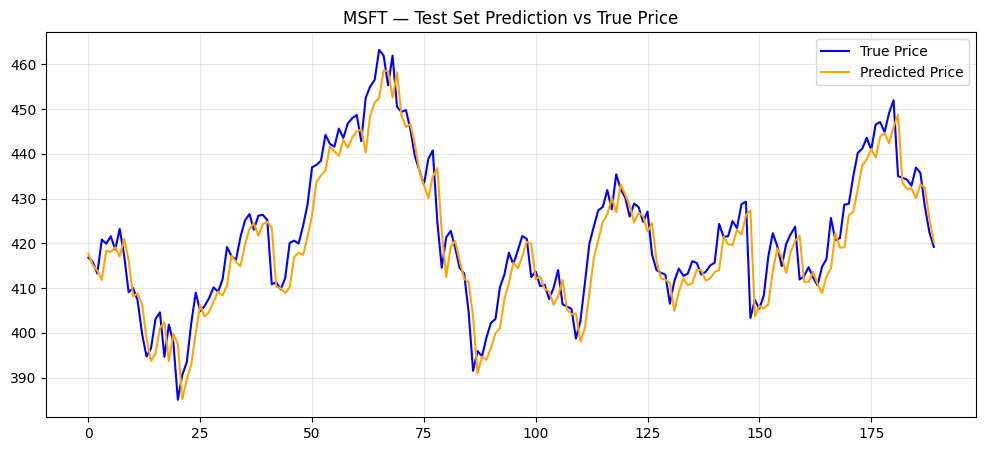

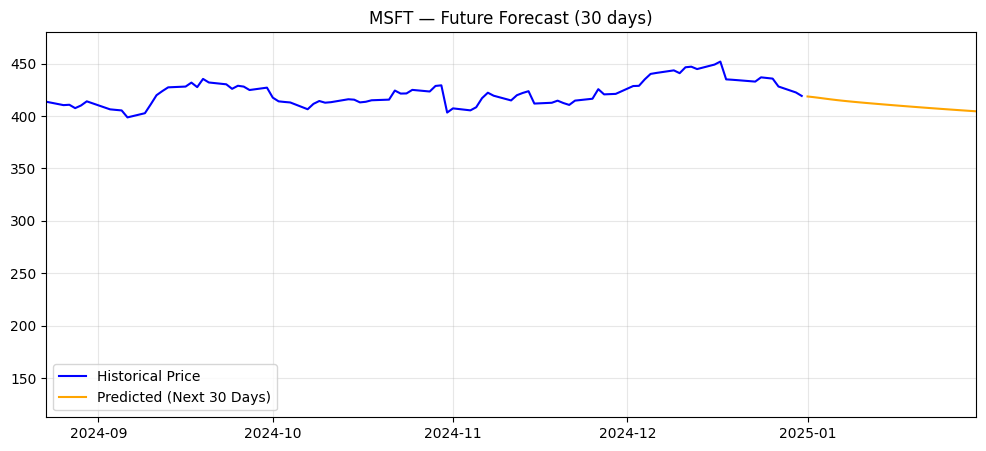

In [26]:
# 1️⃣ LẤY DỮ LIỆU
ticker = "MSFT"  # có thể đổi sang TSLA, MSFT, BTC-USD, ...
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
close_prices = data[['Close']].values

# 2️⃣ CHUẨN HÓA DỮ LIỆU
scaler = MinMaxScaler(feature_range=(0, 1))     
scaled = scaler.fit_transform(close_prices)

# HÀM TẠO SEQUENCE
def create_sequences(dataset, seq_length=30):
    X, y = [], []
    for i in range(len(dataset) - seq_length):
        X.append(dataset[i:i+seq_length])
        y.append(dataset[i+seq_length])
    return np.array(X), np.array(y)

seq_len = 30


train_size = int(len(scaled) * 0.7)
val_size = int(len(scaled) * 0.15)
test_size = len(scaled) - train_size - val_size

train_data = scaled[0:train_size]
val_data = scaled[train_size - seq_len : train_size + val_size] # Lấy thêm seq_len để tạo sequence đầu tiên
test_data = scaled[train_size + val_size - seq_len:] # Tương tự

X_train, y_train = create_sequences(train_data, seq_len)
X_val, y_val = create_sequences(val_data, seq_len)
X_test, y_test = create_sequences(test_data, seq_len)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32) # <<< THÊM MỚI
y_val_tensor = torch.tensor(y_val, dtype=torch.float32) # <<< THÊM MỚI
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

# 3️⃣ ĐỊNH NGHĨA MÔ HÌNH LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 4️⃣ HUẤN LUYỆN MÔ HÌNH
epochs = 100

train_losses = []
val_losses = []
for epoch in range(epochs):
    model.train()
    batch_losses = []
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        out = model(X_batch)
        loss = criterion(out, y_batch)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())

    train_loss = np.mean(batch_losses)
    train_losses.append(train_loss)

    # --- Validation ---
    model.eval() # Chuyển sang chế độ đánh giá
    with torch.no_grad(): # Không cần tính gradient cho validation
        val_preds = model(X_val_tensor)
        val_loss = criterion(val_preds, y_val_tensor).item()
        val_losses.append(val_loss)

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}")


model.eval()
with torch.no_grad():
    preds_test = model(X_test_tensor).numpy()

# Giải scale ngược
pred_prices = scaler.inverse_transform(preds_test)
true_prices = scaler.inverse_transform(y_test_tensor.numpy())

# TÍNH CHỈ SỐ
mae = mean_absolute_error(true_prices, pred_prices)
rmse = np.sqrt(mean_squared_error(true_prices, pred_prices))
r2 = r2_score(true_prices, pred_prices)
print(f"\n📊 Model Evaluation on Test Set:")
print(f"MAE = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R² = {r2:.3f}")

# 6️⃣ VẼ BIỂU ĐỒ ĐỐI CHIẾU
plt.figure(figsize=(12,5))
plt.plot(true_prices, label='True Price', color='blue')
plt.plot(pred_prices, label='Predicted Price', color='orange')
plt.title(f"{ticker} — Test Set Prediction vs True Price")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 7️⃣ DỰ BÁO 30 NGÀY TIẾP THEO
last_seq = scaled[-seq_len:]
pred_future = []
alpha = 0.3  # làm mượt dự báo

for _ in range(30):
    with torch.no_grad():
        inp = torch.tensor(last_seq.reshape(1, seq_len, 1), dtype=torch.float32)
        pred = model(inp).item()
        pred = alpha * pred + (1 - alpha) * last_seq[-1]  # smoothing
        pred = np.clip(pred, 0, 1)
        pred_future.append(pred)
        last_seq = np.append(last_seq[1:], pred).reshape(seq_len, 1)

pred_future = scaler.inverse_transform(np.array(pred_future).reshape(-1, 1))
future_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30)

# 8️⃣ VẼ BIỂU ĐỒ DỰ BÁO
plt.figure(figsize=(12,5))
plt.plot(data.index, data['Close'], label='Historical Price', color='blue')
plt.plot(future_index, pred_future, label='Predicted (Next 30 Days)', color='orange')
plt.title(f"{ticker} — Future Forecast (30 days)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([data.index[-90], future_index[-1]])  # zoom 3 tháng cuối + dự báo
plt.show()

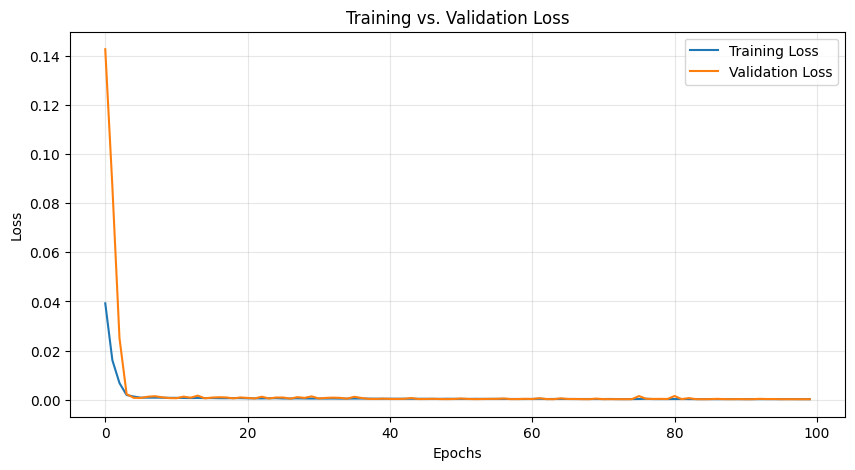

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title("Training vs. Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [7]:
close_prices = data[['Close']].values
print(close_prices.shape)

(502, 1)


100.39999999999998
